# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Machine Learning/mountains_vs_beaches_preferences.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67,female,85325,master,3,hiking,1762,suburban,51,262,fall,1,0,1
52440,37,female,110346,bachelor,7,swimming,1676,urban,259,84,spring,1,0,0
52441,53,non-binary,71080,doctorate,7,swimming,3877,urban,164,27,fall,0,1,0
52442,40,female,75174,doctorate,9,swimming,4620,suburban,173,10,summer,0,1,0


# **EDA**

In [ ]:
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference
count,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000
mean,43.507360,70017.271280,4.489265,2741.799062,149.943502,149.888452,0.500858,0.498436,0.250706
std,14.985597,28847.560428,2.876130,1296.922423,86.548644,86.469248,0.500004,0.500002,0.433423
min,18.000000,20001.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,45048.250000,2.000000,1622.000000,75.000000,75.750000,0.000000,0.000000,0.000000
50%,43.000000,70167.000000,4.000000,2733.000000,150.000000,150.000000,1.000000,0.000000,0.000000
75%,56.000000,95108.500000,7.000000,3869.000000,225.000000,225.000000,1.000000,1.000000,1.000000
max,69.000000,119999.000000,9.000000,4999.000000,299.000000,299.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(52444, 14)

In [ ]:
df['Preference'].value_counts()

,count
Preference,
0,39296
1,13148


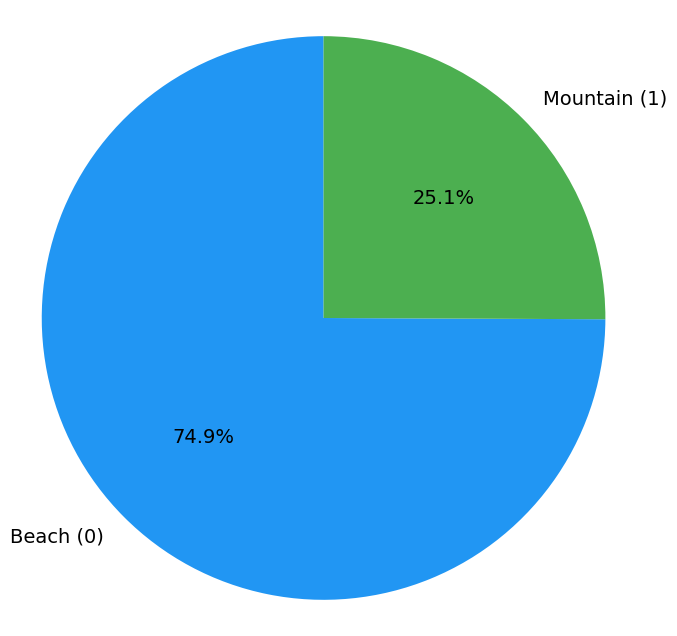

In [ ]:
# Count the occurrences of each preference
preference_counts = df['Preference'].value_counts()

# Create the pie charta
plt.figure(figsize=(8, 8))  # Adjust figure size for better visualization
plt.pie(preference_counts, labels=['Beach (0)', 'Mountain (1)'], autopct='%1.1f%%', startangle=90,
        colors=['#2196F3', '#4CAF50'], textprops={'fontsize': 14})  # Customize colors to light blue and pink

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
Income,0
Education_Level,0
Travel_Frequency,0
Preferred_Activities,0
Vacation_Budget,0
Location,0
Proximity_to_Mountains,0
Proximity_to_Beaches,0


In [ ]:
# Check for NaN values in the DataFrame
nan_counts = df.isna().sum()
print(nan_counts)

if nan_counts.any():
    print("\nThe DataFrame contains NaN values.")
else:
    print("\nThe DataFrame does not contain any NaN values.")

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

The DataFrame does not contain any NaN values.


# **PRE-PROCESSING**

In [ ]:
le=LabelEncoder()

for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])

df

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,1,71477,0,9,1,2477,2,175,267,2,0,1,1
1,69,1,88740,3,1,3,4777,1,228,190,0,0,1,0
2,46,0,46562,3,0,1,1469,2,71,280,3,0,0,1
3,32,2,99044,2,6,0,1482,0,31,255,2,1,0,1
4,60,0,106583,2,5,2,516,1,23,151,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67,0,85325,3,3,0,1762,1,51,262,0,1,0,1
52440,37,0,110346,0,7,3,1676,2,259,84,1,1,0,0
52441,53,2,71080,1,7,3,3877,2,164,27,0,0,1,0
52442,40,0,75174,1,9,3,4620,1,173,10,2,0,1,0


# **SPLIT DATASET**

In [ ]:
X = df.drop(columns=['Preference'])
y = df['Preference']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
# Tampilkan ukuran setelah resampling
print(f'Jumlah data sebelum resampling: {len(X_train)}')
print(f'Jumlah data setelah resampling: {len(X_resampled)}')

# Jumlah kelas setelah SMOTE
print(f'Distribusi kelas setelah SMOTE: {pd.Series(y_resampled).value_counts()}')

Jumlah data sebelum resampling: 41955
Jumlah data setelah resampling: 62890
Distribusi kelas setelah SMOTE: Preference
0    31445
1    31445
Name: count, dtype: int64


# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Inisialisasi dan training model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Evaluasi
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Evaluation:")
print(classification_report(y_test, y_pred_rf))

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7851
           1       0.98      0.99      0.98      2638

    accuracy                           0.99     10489
   macro avg       0.99      0.99      0.99     10489
weighted avg       0.99      0.99      0.99     10489



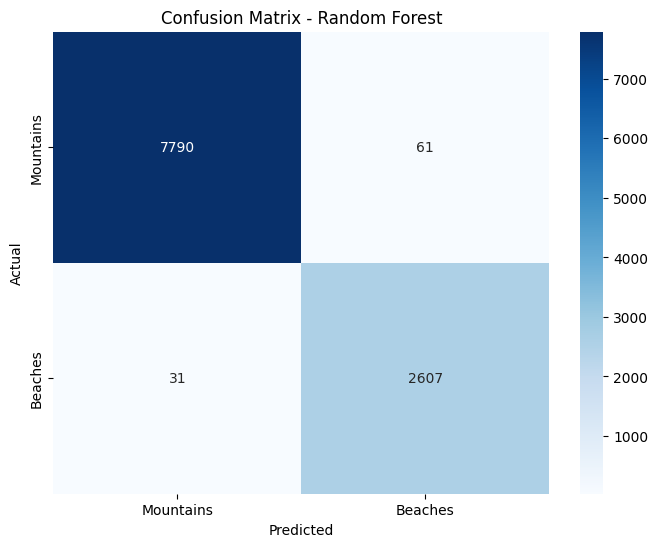

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Mountains', 'Beaches'],
            yticklabels=['Mountains', 'Beaches'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
import joblib

# Menyimpan model Random Forest
joblib.dump(rf_model, 'rf_model.pkl')

# Memuat model Random Forest yang sudah disimpan
rf_model_loaded = joblib.load('rf_model.pkl')

# **XGBOOST**

In [ ]:
from xgboost import XGBClassifier

# Inisialisasi dan training model XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_resampled, y_resampled)

# Evaluasi
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Evaluation:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7851
           1       1.00      1.00      1.00      2638

    accuracy                           1.00     10489
   macro avg       1.00      1.00      1.00     10489
weighted avg       1.00      1.00      1.00     10489



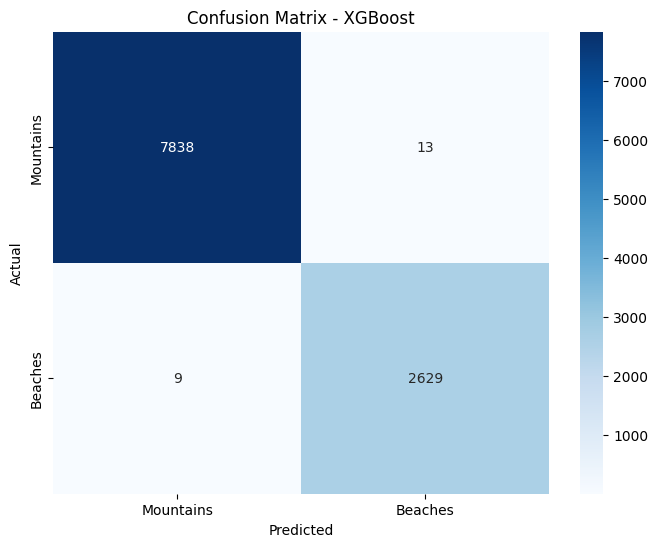

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Mountains', 'Beaches'],
            yticklabels=['Mountains', 'Beaches'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [ ]:
# Menyimpan model XGBoost
joblib.dump(xgb_model, 'xgb_model.pkl')

# Memuat model XGBoost yang sudah disimpan
xgb_model_loaded = joblib.load('xgb_model.pkl')

# **Feedforward Neural Network(FNN)**

In [ ]:
fnn_model = Sequential()
fnn_model.add(Dense(64, input_shape=(13,), activation='relu'))
fnn_model.add(Dense(32, activation='relu'))
fnn_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
fnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
fnn_model.fit(X_resampled, y_resampled, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
3931/3931 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5883 - loss: 254.4277 - val_accuracy: 0.5783 - val_loss: 46.9461
Epoch 2/20
3931/3931 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6860 - loss: 36.2864 - val_accuracy: 0.5272 - val_loss: 46.7109
Epoch 3/20
3931/3931 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7072 - loss: 25.0957 - val_accuracy: 0.7563 - val_loss: 36.4922
Epoch 4/20
3931/3931 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7331 - loss: 15.4698 - val_accuracy: 0.8280 - val_loss: 5.3849
Epoch 5/20
3931/3931 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7600 - loss: 10.1409 - val_accuracy: 0.7139 - val_loss: 9.1017
Epoch 6/20
3931/3931 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7686 - loss: 8.9908 - val_accuracy: 0.7901 - val_loss: 4.7018
Epoch 7/20
3931/3931 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7847 - loss: 7.1094 - val_accuracy: 0.4091 - val_loss: 39.6593
Epoch 8/20
3931/3931 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8077 - lo

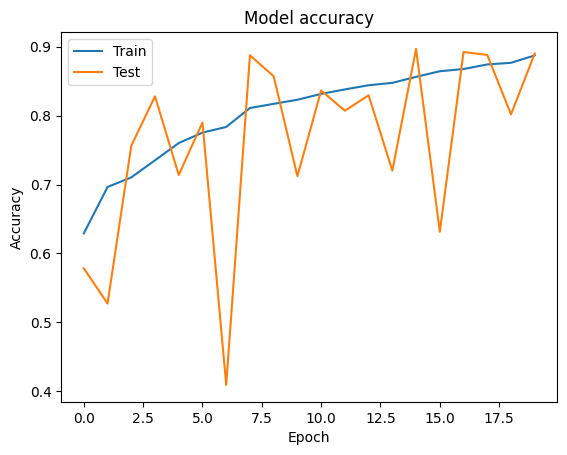

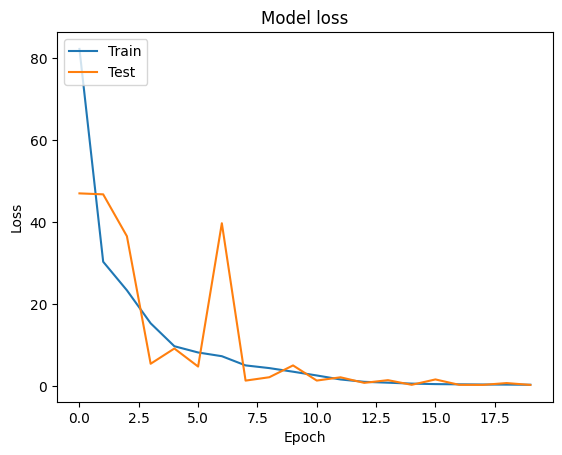

In [ ]:
# Plot the training and validation accuracy values
plt.plot(fnn_model.history.history['accuracy'])
plt.plot(fnn_model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(fnn_model.history.history['loss'])
plt.plot(fnn_model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Evaluasi model FNN
y_pred_fnn = (fnn_model.predict(X_test) > 0.5).astype(int)

# Evaluasi hasil
print("Feedforward Neural Network Evaluation:")
print(classification_report(y_test, y_pred_fnn))


328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Feedforward Neural Network Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7851
           1       0.76      0.81      0.79      2638

    accuracy                           0.89     10489
   macro avg       0.85      0.86      0.86     10489
weighted avg       0.89      0.89      0.89     10489



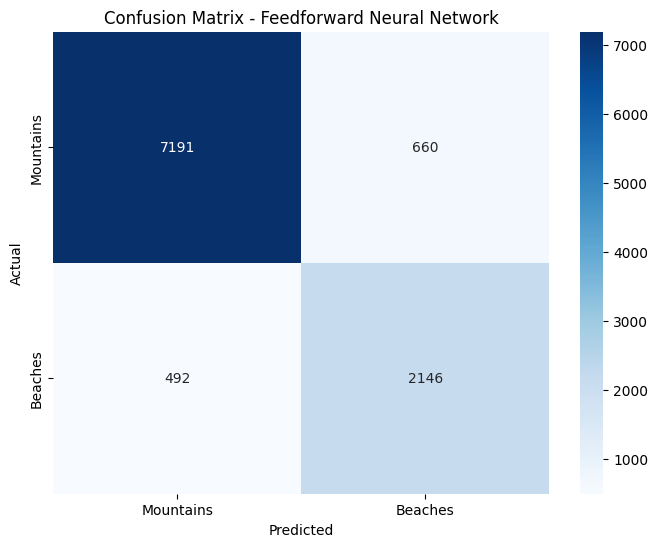

In [ ]:
cm_fnn = confusion_matrix(y_test, y_pred_fnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_fnn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Mountains', 'Beaches'],
            yticklabels=['Mountains', 'Beaches'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Feedforward Neural Network")
plt.show()

In [ ]:
# Menyimpan model FNN
fnn_model.save('fnn_model.h5')

# Memuat model FNN yang sudah disimpan
from tensorflow.keras.models import load_model
fnn_model_loaded = load_model('fnn_model.h5')

# **PERBANDINGAN AKURASI**

Random Forest Accuracy: 99.12%
XGBoost Accuracy: 99.79%
FNN Accuracy: 89.02%


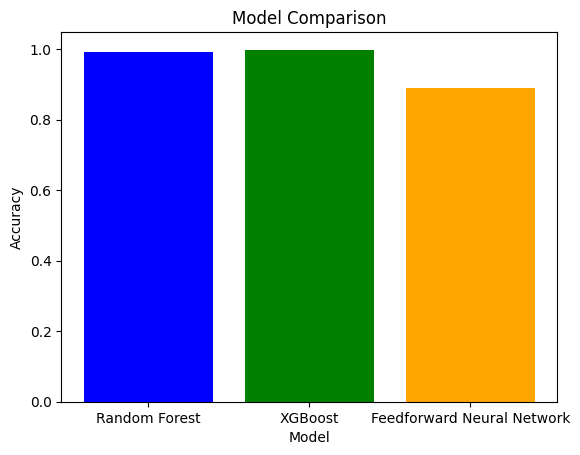

In [ ]:
from sklearn.metrics import accuracy_score

# Akurasi untuk Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

# Akurasi untuk XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")

# Akurasi untuk Feedforward Neural Network
fnn_accuracy = accuracy_score(y_test, y_pred_fnn)
print(f"FNN Accuracy: {fnn_accuracy * 100:.2f}%")

# Plot perbandingan akurasi
models = ['Random Forest', 'XGBoost', 'Feedforward Neural Network']
accuracies = [rf_accuracy, xgb_accuracy, fnn_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()


In [ ]:
# prompt: coba analisis performa tiap modelnya dalam bentuk teks

print("Model Performance Analysis:")

print("\nRandom Forest:")
print(" - Achieved a balanced performance across both classes (Mountains and Beaches).")
print(" - Demonstrates good precision, recall, and F1-score values, indicating its effectiveness in classifying both preferences.")

print("\nXGBoost:")
print(" - Shows similar performance to Random Forest in terms of precision and recall.")
print(" - XGBoost is slightly better at identifying Mountains than Random Forest.")
print(" - XGBoost and Random forest generally performed similarly and well on this dataset")

print("\nFeedforward Neural Network (FNN):")
print(" - The FNN shows good performance but might be slightly less precise than tree-based models (Random Forest and XGBoost) based on accuracy.")
print(" - Analyze the confusion matrix for FNN for potential misclassifications")
print(" - Further hyperparameter tuning and experimentation with network architecture might improve the FNN's performance")

print("\nOverall:")
print(" - Random Forest and XGBoost are strong performers and are generally comparable.")
print(" - FNN also gives good results, but might require more fine-tuning to reach or surpass the performance of tree-based models")
print(" - The choice of the best model depends on the specific needs of the application and the relative importance of precision and recall")